In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
sns.set_style("darkgrid")
sns.set_palette('rocket')

# BASIC EVALS

In [50]:
def get_means(model, loc, explicit_country, eval):
    path = f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-{explicit_country}-20-1.0'
    
    means = [[], []]
    
    for i in range(1, 21):
        try:
            means[0].append(np.load(f'{path}/run{i}_fixed/{eval}_move1.npy').mean())
            means[1].append(np.load(f'{path}/run{i}_fixed/{eval}_move2.npy').mean())
        except:
            pass

    return means

In [55]:
gpt35t_free_False_bert = get_means('gpt3.5turbo', 'free', False, 'bert')
gpt35t_free_True_bert = get_means('gpt3.5turbo', 'free', True, 'bert')
gpt4_free_False_bert = get_means('gpt4', 'free', False, 'bert')
gpt4_free_True_bert = get_means('gpt4', 'free', True, 'bert')

In [56]:
gpt35t_free_False_bidir = get_means('gpt3.5turbo', 'free', False, 'bidir')
gpt35t_free_True_bidir = get_means('gpt3.5turbo', 'free', True, 'bidir')
gpt4_free_False_bidir = get_means('gpt4', 'free', False, 'bidir')
gpt4_free_True_bidir = get_means('gpt4', 'free', True, 'bidir')

In [60]:
gpt35t_rank_False_kendall = get_means('gpt3.5turbo', 'rank', False, 'kendall')
gpt35t_rank_True_kendall = get_means('gpt3.5turbo', 'rank', True, 'kendall')
gpt4_rank_False_kendall = get_means('gpt4', 'rank', False, 'kendall')
gpt4_rank_True_kendall = get_means('gpt4', 'rank', True, 'kendall')

In [61]:
gpt35t_rank_False_spearman = get_means('gpt3.5turbo', 'rank', False, 'spearman')
gpt35t_rank_True_spearman = get_means('gpt3.5turbo', 'rank', True, 'spearman')
gpt4_rank_False_spearman = get_means('gpt4', 'rank', False, 'spearman')
gpt4_rank_True_spearman = get_means('gpt4', 'rank', True, 'spearman')

In [62]:
gpt35t_rank_False_hamming = get_means('gpt3.5turbo', 'rank', False, 'hamming')
gpt35t_rank_True_hamming = get_means('gpt3.5turbo', 'rank', True, 'hamming')
gpt4_rank_False_hamming = get_means('gpt4', 'rank', False, 'hamming')
gpt4_rank_True_hamming = get_means('gpt4', 'rank', True, 'hamming')

# RANK PLOTTING

In [68]:
all_kendall = pd.DataFrame(
    [
        gpt35t_rank_False_kendall[0], gpt35t_rank_False_kendall[1],
        gpt35t_rank_True_kendall[0], gpt35t_rank_True_kendall[1],
        gpt4_rank_False_kendall[0], gpt4_rank_False_kendall[1],
        gpt4_rank_True_kendall[0], gpt4_rank_True_kendall[1],
    ]
).T

In [69]:
all_kendall.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [70]:
all_kendall = all_kendall.fillna(all_kendall.mean()) # fills nan values with mean of column

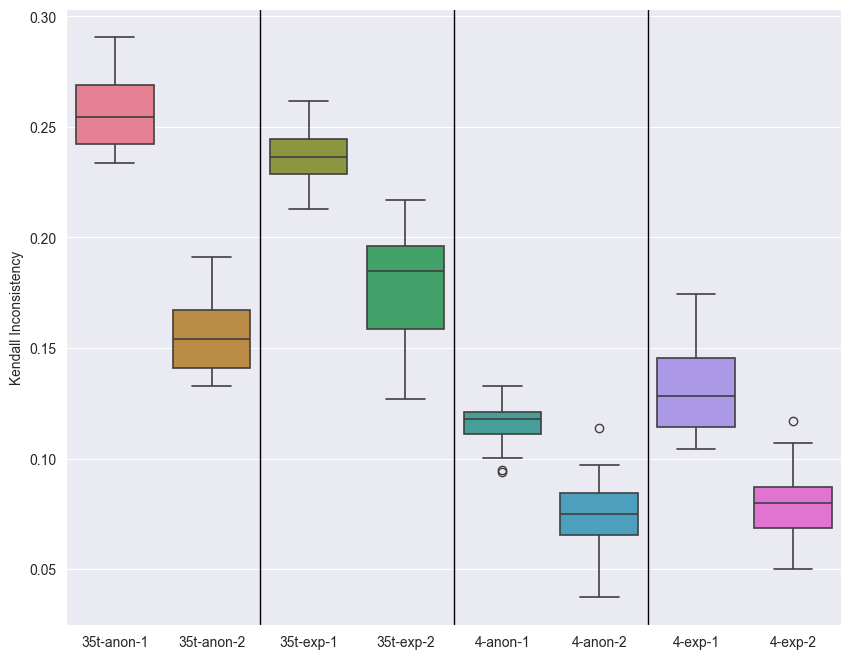

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

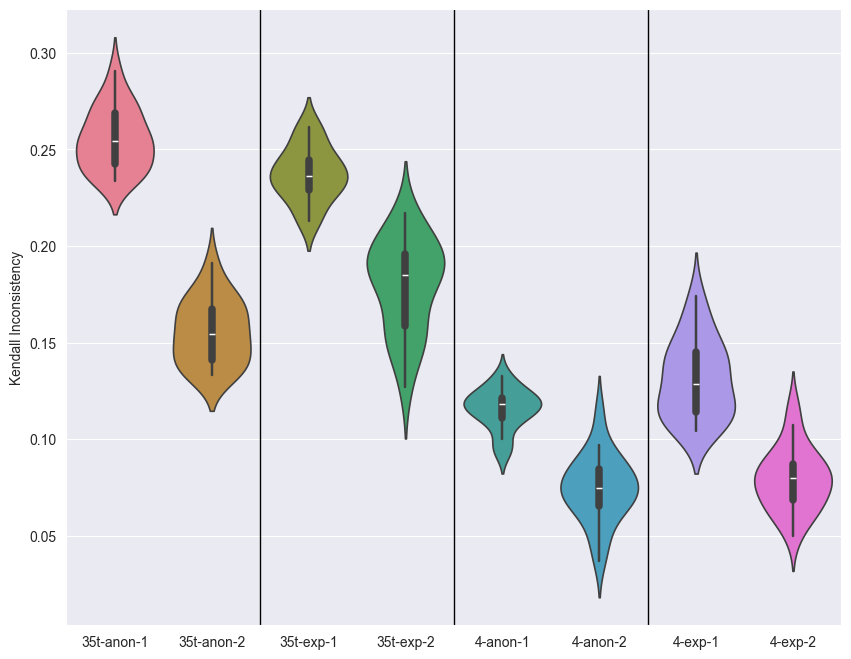

In [72]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [73]:
all_spearman = pd.DataFrame(
    [
        gpt35t_rank_False_spearman[0], gpt35t_rank_False_spearman[1],
        gpt35t_rank_True_spearman[0], gpt35t_rank_True_spearman[1],
        gpt4_rank_False_spearman[0], gpt4_rank_False_spearman[1],
        gpt4_rank_True_spearman[0], gpt4_rank_True_spearman[1],
    ]
).T

In [74]:
all_spearman.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [75]:
all_spearman = all_spearman.fillna(all_spearman.mean()) # fills nan values with mean of column

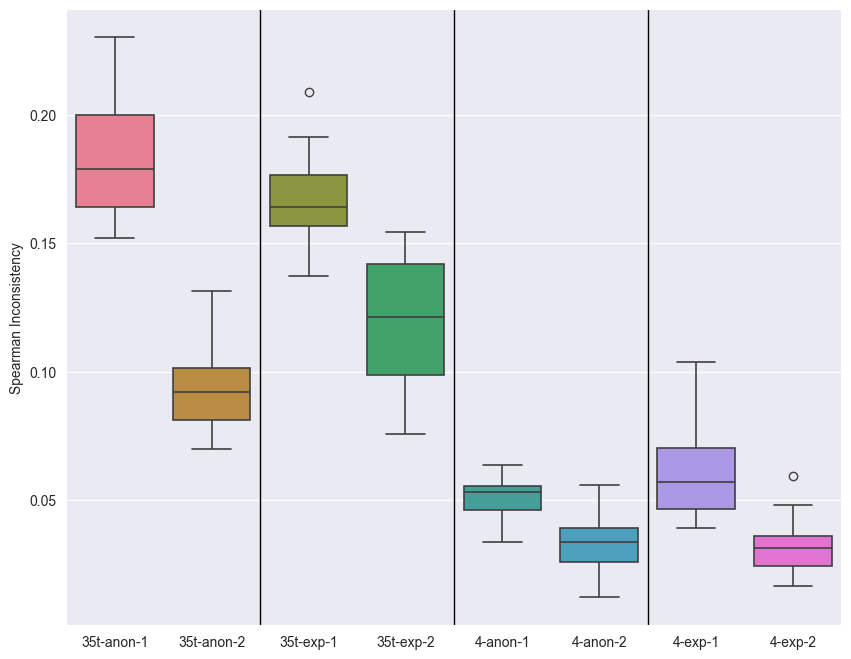

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_spearman, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [81]:
all_hamming = pd.DataFrame(
    [
        gpt35t_rank_False_hamming[0], gpt35t_rank_False_hamming[1],
        gpt35t_rank_True_hamming[0], gpt35t_rank_True_hamming[1],
        gpt4_rank_False_hamming[0], gpt4_rank_False_hamming[1],
        gpt4_rank_True_hamming[0], gpt4_rank_True_hamming[1],
    ]
).T

In [82]:
all_hamming.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [83]:
all_hamming = all_hamming.fillna(all_hamming.mean()) # fills nan values with mean of column

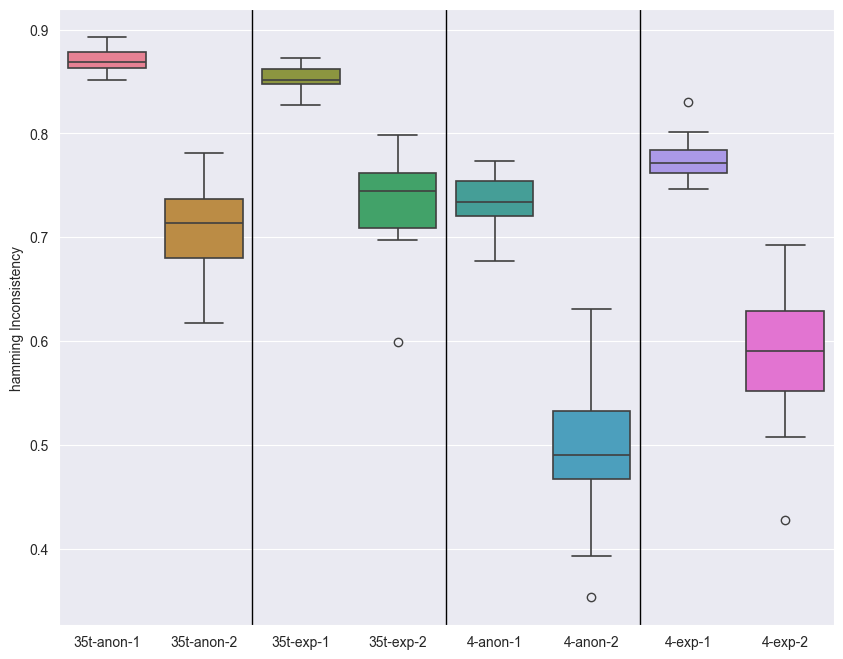

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_hamming, linewidth=1.2)
plt.ylabel('hamming Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

# BERT PLOTTING

In [86]:
all_bert = pd.DataFrame(
    [
        gpt35t_free_False_bert[0], gpt35t_free_False_bert[1],
        gpt35t_free_True_bert[0], gpt35t_free_True_bert[1],
        gpt4_free_False_bert[0], gpt4_free_False_bert[1],
        gpt4_free_True_bert[0], gpt4_free_True_bert[1],
    ]
).T

In [87]:
all_bert.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

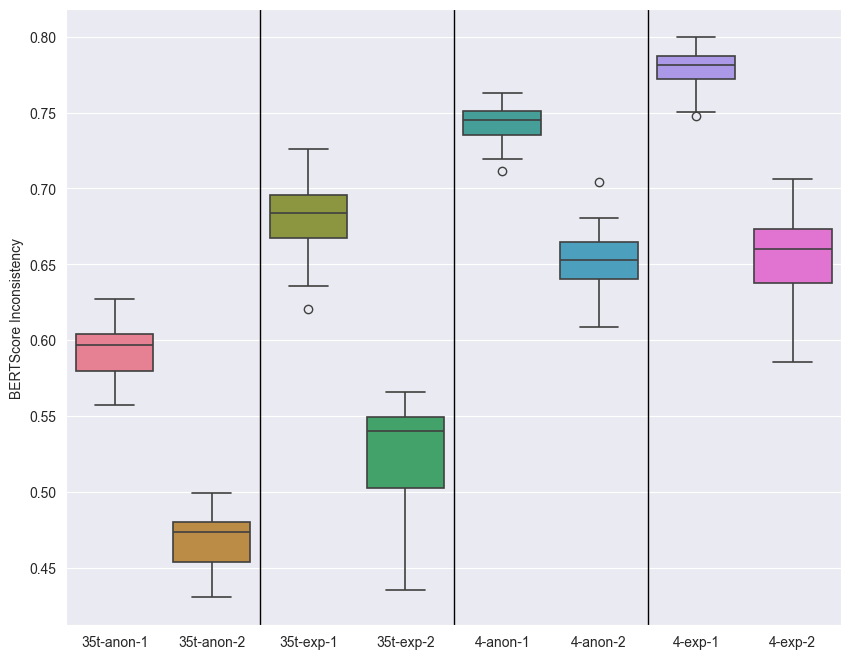

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

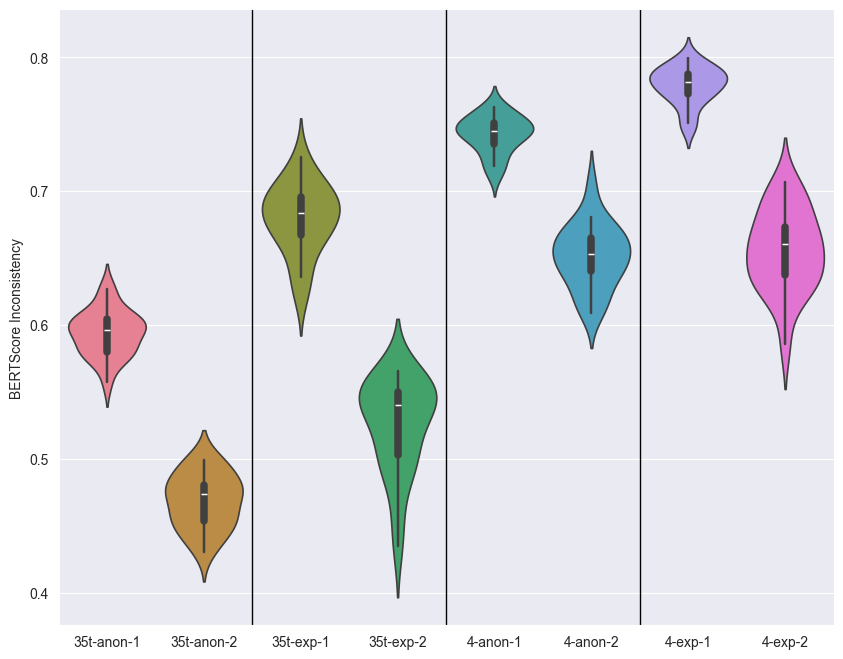

In [89]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [90]:
all_bidir = pd.DataFrame(
    [
        gpt35t_free_False_bidir[0], gpt35t_free_False_bidir[1],
        gpt35t_free_True_bidir[0], gpt35t_free_True_bidir[1],
        gpt4_free_False_bidir[0], gpt4_free_False_bidir[1],
        gpt4_free_True_bidir[0], gpt4_free_True_bidir[1],
    ]
).T

In [92]:
all_bidir.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

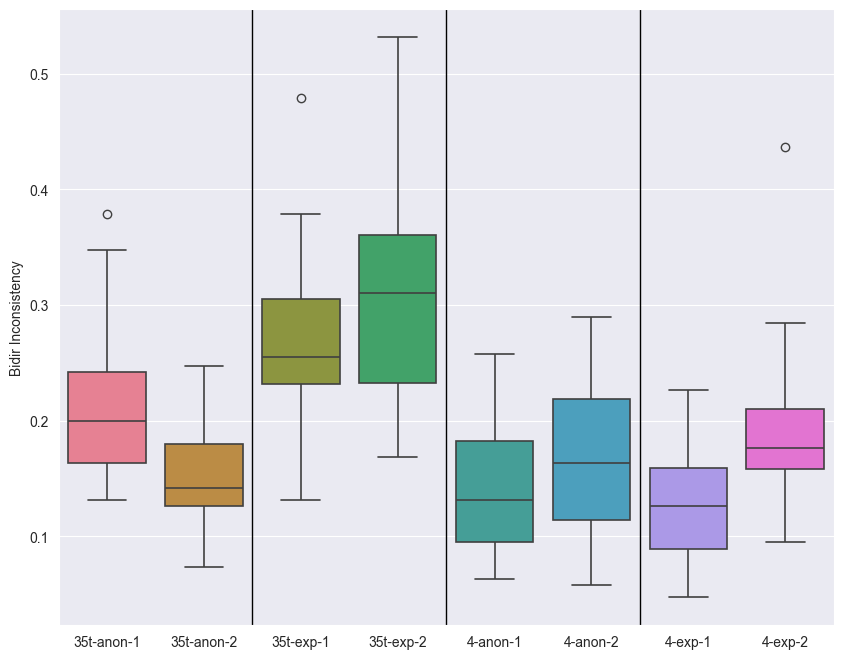

In [93]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bidir, linewidth=1.2)
plt.ylabel('Bidir Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [110]:
np.load('')

[0.21052631578947367,
 0.13157894736842105,
 0.4789473684210526,
 0.3105263157894737,
 0.2578947368421053,
 0.30526315789473685,
 0.21578947368421053,
 0.14736842105263157,
 0.25263157894736843,
 0.37894736842105264,
 0.24210526315789474,
 0.24210526315789474,
 0.3263157894736842,
 0.29473684210526313,
 0.2578947368421053,
 0.18947368421052632,
 0.30526315789473685,
 0.24210526315789474,
 0.23684210526315788,
 0.26842105263157895]

# BERTScore using Deberta

In [13]:
def get_means(path, fixed):
    means = [[], []]

    for i in range(1, 21):
        loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_berts.npz')
        m1 = loaded_berts['move1']
        m2 = loaded_berts['move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [14]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0', '_fixed') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-True-20-1.0', '')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0', '_fixed')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0', '')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0', '_fixed')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0', '')

In [24]:
everything = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1]
]).T

everything.columns = [
    'c-anon-1', 'c-anon-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-anon-1', 'gpt35-anon-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-anon-1', 'gpt4-anon-2',
    'gpt4-exp-1', 'gpt4-exp-2',
]

In [25]:
everything

,c-anon-1,c-anon-2,c-exp-1,c-exp-2,gpt35-anon-1,gpt35-anon-2,gpt35-exp-1,gpt35-exp-2,gpt4-anon-1,gpt4-anon-2,gpt4-exp-1,gpt4-exp-2
0,0.602840,0.472521,0.604870,0.374881,0.588776,0.482067,0.668411,0.431322,0.718185,0.638835,0.708973,0.613509
1,0.587563,0.474181,0.566833,0.325706,0.579724,0.504388,0.644892,0.487676,0.714248,0.623808,0.715615,0.652814
2,0.585428,0.436464,0.597583,0.384739,0.579137,0.416993,0.610080,0.515286,0.701615,0.656255,0.708567,0.609741
3,0.570553,0.432218,0.569157,0.364641,0.582504,0.484922,0.597384,0.505214,0.708453,0.631635,0.694918,0.671895
4,0.577045,0.436403,0.594787,0.366239,0.570683,0.450486,0.641493,0.510783,0.700711,0.645645,0.714483,0.580840
5,0.578063,0.475122,0.568635,0.350610,0.597853,0.485270,0.621257,0.500956,0.684785,0.655024,0.722239,0.646322
6,0.572134,0.460063,0.567066,0.357607,0.607458,0.469375,0.622818,0.447220,0.683548,0.635008,0.674338,0.624486
7,0.571809,0.438261,0.577859,0.359131,0.581588,0.503727,0.654438,0.464176,0.702223,0.602589,0.703435,0.612539
8,0.597133,0.455942,0.591395,0.372346,0.592081,0.458995,0.622869,0.494315,0.703031,0.653624,0.723219,0.626170
9,0.573423,0.437289,0.581566,0.343944,0.570248,0.489775,0.585651,0.490591,0.690815,0.642268,0.709846,0.649356


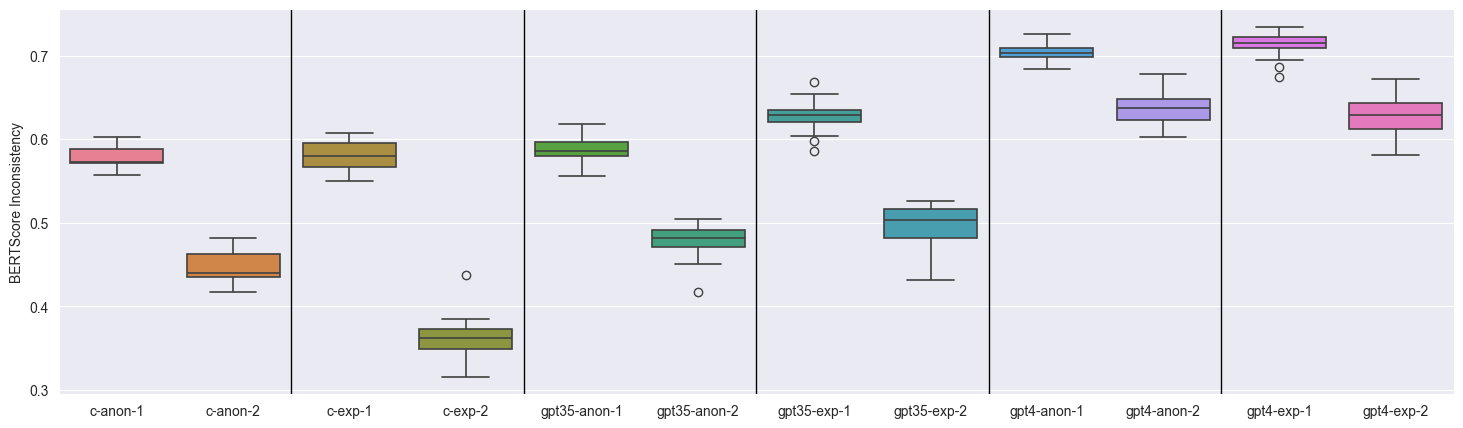

In [41]:
plt.figure(figsize=(18, 5))
sns.boxplot(everything, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [42]:
explicit_comps = everything[['c-exp-1', 'c-exp-2', 'gpt35-exp-1', 'gpt35-exp-2', 'gpt4-exp-1', 'gpt4-exp-2']]

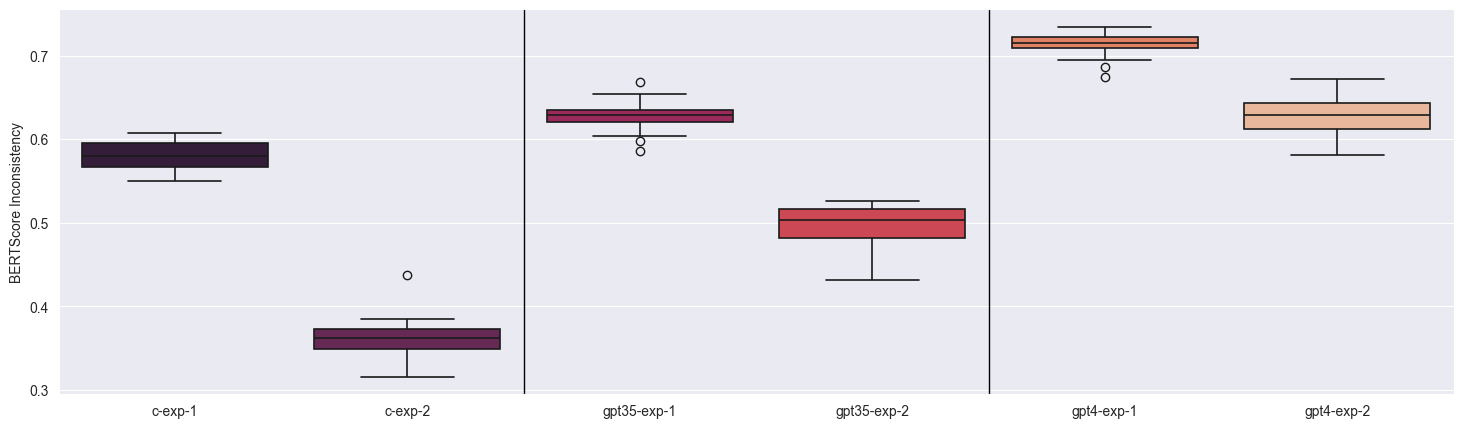

In [44]:
plt.figure(figsize=(18, 5))
sns.boxplot(explicit_comps, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [45]:
anon_comps = everything[['c-anon-1', 'c-anon-2', 'gpt35-anon-1', 'gpt35-anon-2', 'gpt4-anon-1', 'gpt4-anon-2']]

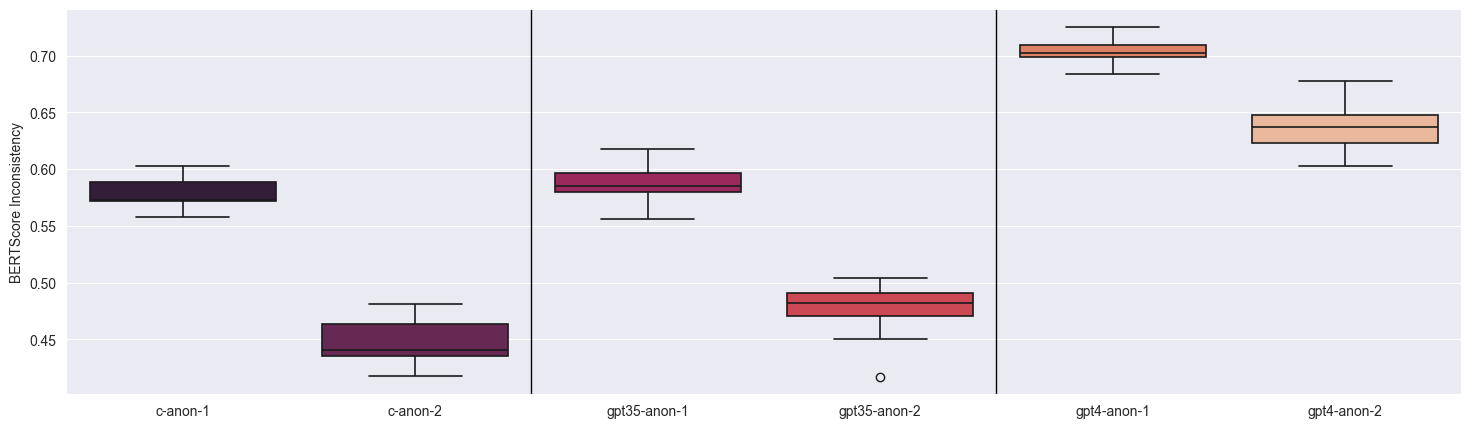

In [46]:
plt.figure(figsize=(18, 5))
sns.boxplot(anon_comps, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [47]:
move1_comps = everything[['c-anon-1', 'c-exp-1', 'gpt35-anon-1', 'gpt35-exp-1', 'gpt4-anon-1', 'gpt4-exp-1']]

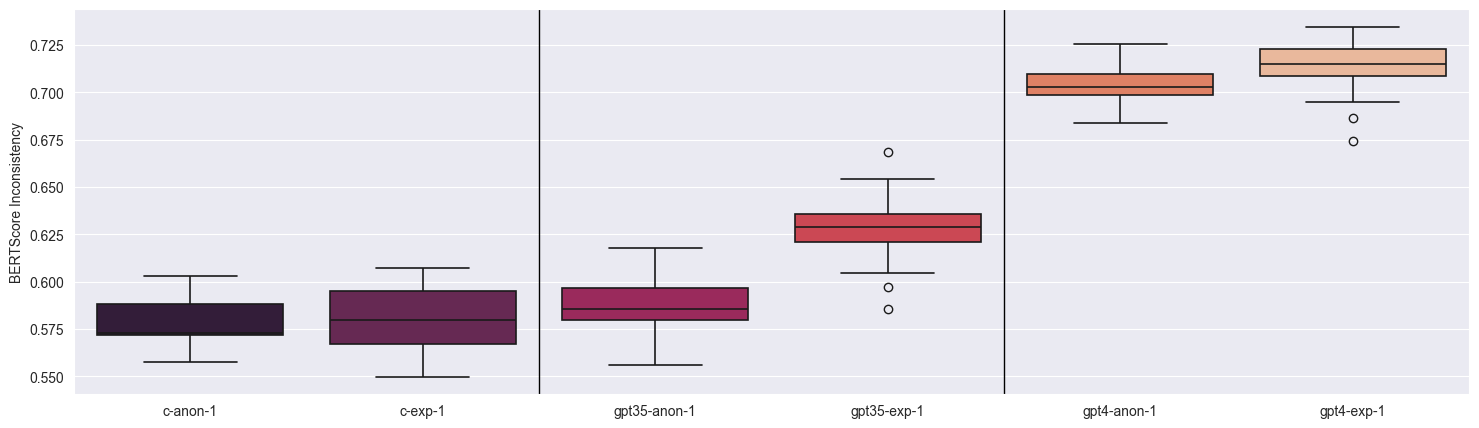

In [49]:
plt.figure(figsize=(18, 5))
sns.boxplot(move1_comps, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [50]:
move2_comps = everything[['c-anon-2', 'c-exp-2', 'gpt35-anon-2', 'gpt35-exp-2', 'gpt4-anon-2', 'gpt4-exp-2']]

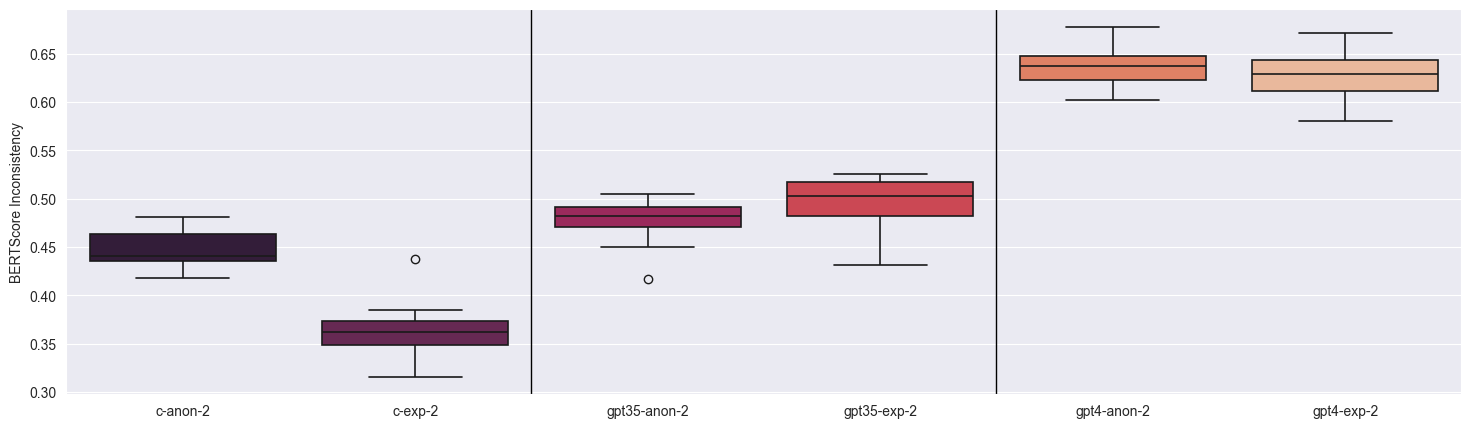

In [51]:
plt.figure(figsize=(18, 5))
sns.boxplot(move2_comps, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5]:
    plt.axvline(x=i, color='black', linewidth=1)